# Assignment 2

In this assignment your goal is to predict the credit application result (not granted / granted) based on multiple features. You'll have to do everything on your own this time, no hints.

The dataset contains 15 features (named A1 - A15) and one target variable (T). We don't know what the features are, we only know what values they take:

* A1: b, a.
* A2: continuous
* A3: continuous
* A4: u, y, l, t
* A5: g, p, gg
* A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff
* A7: v, h, bb, j, n, z, dd, ff, o
* A8: continuous
* A9: t, f
* A10: t, f
* A11: continuous
* A12: t, f
* A13: g, p, s
* A14: continuous
* A15: continuous
* T: +, -

There are 6 features that are continous, 3 true/false variables and 6 categorical variables that take different values each.

From the basic diagnostic of the data, you can see it's a real mess. There are different data types, missing observations etc.

Your task is to build three different classifiers (and one additional GridSearched) that correctly (as much as possible) predict the credit application decision (this is the target variable 'T'). To achieve this, you'll have to do the following:

1. Clean up the dataset - when you read it now, you'll notice that the data is not correctly parsed. The columns that contain numbers are read as 'object' type columns. This is because the missing values in the data set are marked with ?'s.
Deal with it by correctly recognizing ?'s as missing values and dropping them from the dataset.
2. Encode the features - there are a lot of categorical features with char values. You'll need to use [LabelEncoder and OneHotEncoder](https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621) for them. Also, see if you need to use OneHotEncoder for all of them - for example by checking the correlations between a LabelEncoded feature and the target variable before and after OneHot Encoding. (OneHot encoding doesn't make any sense if your variable actually represents some incremental, hieraarchical relationship - and we don't know it for our dataset).
3. This brings us to the next point - take a look into the data set: plot the histograms, check the skewness, correlations etc. ([also check this](https://seaborn.pydata.org/generated/seaborn.pairplot.html))
4. Train at least 3 diffeent classifiers using cross-validation. There must be at least one *simple* and one ensemble classifier. Compare those classifiers' precissions, recalls, ROC's etc. **Don't forget to use cross-validation.**
5. For one selected classifier run Grid Search and, once the best parameter combination is found, compare it's performance metrics with those of classifiers from point 4.

Scoring:
1. Clean-up: 1 point
2. Encoding: 1 point
3. Data exploration: 2 points (1 point for corellations, histograms, etc., 1 for extras such as attempts at dimensionality reduction or non-linear correlations)
4. Training the 3 classifiers: 1 point for each (3 points total), 1 point for meaningful comparison.
5. Grid Search: 1 point for setting up and training, 1 point for comparing with previous classifiers.


In [54]:
from pandas import read_csv

column_names = [f"A{i}" for i in range(1, 16)]
column_names.append('T')

data = read_csv('data.csv', names=column_names)

In [55]:
print(data.dtypes)

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
T       object
dtype: object


In [56]:
print(data.head(20))

   A1     A2      A3 A4 A5  A6 A7     A8 A9 A10  A11 A12 A13    A14    A15  T
0   b  30.83   0.000  u  g   w  v  1.250  t   t    1   f   g  00202      0  +
1   a  58.67   4.460  u  g   q  h  3.040  t   t    6   f   g  00043    560  +
2   a  24.50   0.500  u  g   q  h  1.500  t   f    0   f   g  00280    824  +
3   b  27.83   1.540  u  g   w  v  3.750  t   t    5   t   g  00100      3  +
4   b  20.17   5.625  u  g   w  v  1.710  t   f    0   f   s  00120      0  +
5   b  32.08   4.000  u  g   m  v  2.500  t   f    0   t   g  00360      0  +
6   b  33.17   1.040  u  g   r  h  6.500  t   f    0   t   g  00164  31285  +
7   a  22.92  11.585  u  g  cc  v  0.040  t   f    0   f   g  00080   1349  +
8   b  54.42   0.500  y  p   k  h  3.960  t   f    0   f   g  00180    314  +
9   b  42.50   4.915  y  p   w  v  3.165  t   f    0   t   g  00052   1442  +
10  b  22.08   0.830  u  g   c  h  2.165  f   f    0   t   g  00128      0  +
11  b  29.92   1.835  u  g   c  h  4.335  t   f    0   f   g  00

In [57]:
# missing values - why is it 0 everywhere?
print(data.isnull().sum())

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
T      0
dtype: int64


In [58]:
for column in data: # looping trough each column of the dataframe
    data = data.loc[data[column] != "?"] #removing all rows with a question mark

In [59]:
print(data.dtypes)
    

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
T       object
dtype: object


In [80]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

onehotencoder = OneHotEncoder(sparse=False)
labelencoder = LabelEncoder()

data_copy = data

In [61]:
data["A1"] = labelencoder.fit_transform(data["A1"]) # remain
data["A4"] = labelencoder.fit_transform(data["A4"])
data["A5"] = labelencoder.fit_transform(data["A5"])
data["A6"] = labelencoder.fit_transform(data["A6"])
data["A7"] = labelencoder.fit_transform(data["A7"])
data["A9"] = labelencoder.fit_transform(data["A9"]) # remain
data["A10"] = labelencoder.fit_transform(data["A10"]) # remain
data["A12"] = labelencoder.fit_transform(data["A12"]) # remain
data["A13"] = labelencoder.fit_transform(data["A13"])
data["T"] = labelencoder.fit_transform(data["T"]) # remain



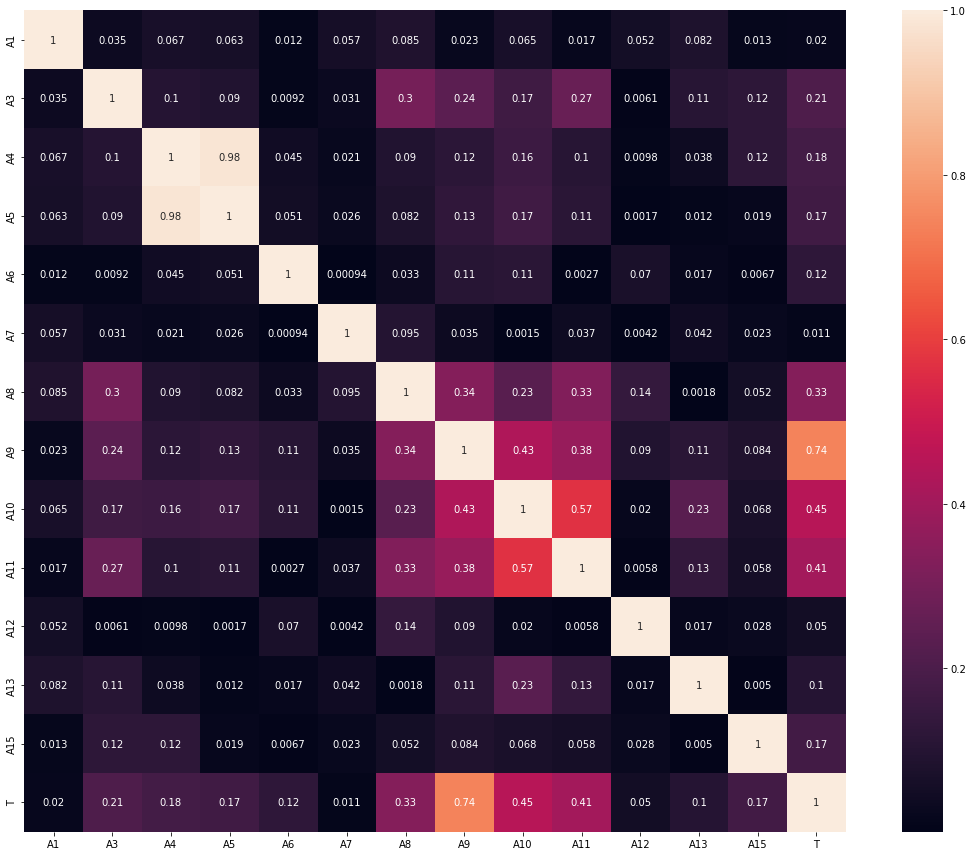

In [62]:
#from sklearn.preprocessing import OneHotEncoder
#x[:, 0] = labelencoder.fit_transform(x[:, 0])
#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder(categorical_features = [0])
#x[:, 0] = labelencoder.fit_transform(x[:, 0])
#x = onehotencoder.fit_transform(x).toarray()

import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr().abs()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, square=True, annot=True)
plt.tight_layout()

In [82]:
data_copy["A1"] = labelencoder.fit_transform(data_copy["A1"]) # remain
data_copy = pd.get_dummies(data_copy, columns=['A4'])
data_copy = pd.get_dummies(data_copy, columns=['A5'])
data_copy = pd.get_dummies(data_copy, columns=['A6'])
data_copy = pd.get_dummies(data_copy, columns=['A7'])
data_copy["A9"] = labelencoder.fit_transform(data_copy["A9"]) # remain
data_copy["A10"] = labelencoder.fit_transform(data_copy["A10"]) # remain
data_copy["A12"] = labelencoder.fit_transform(data_copy["A12"]) # remain
data_copy = pd.get_dummies(data_copy, columns=['A13'])
data_copy["T"] = labelencoder.fit_transform(data_copy["T"]) # remain

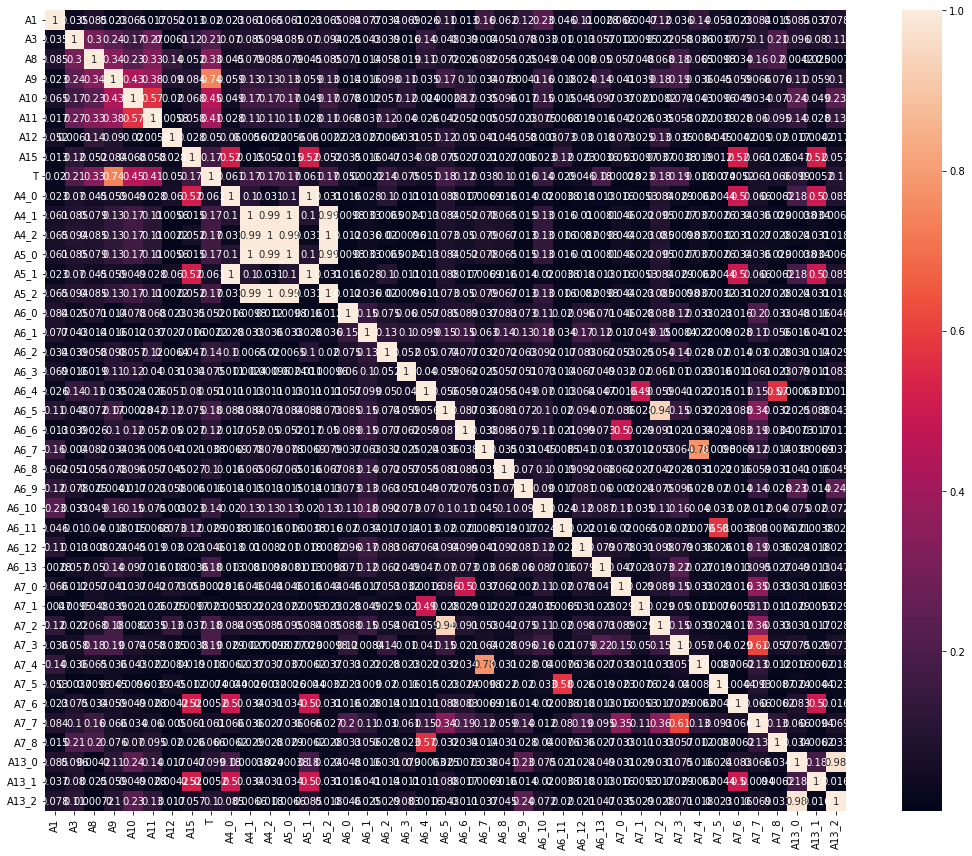

In [83]:
corr = data_copy.corr().abs()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, square=True, annot=True)
plt.tight_layout()

In [ ]:
# every feature that consisted of more then 2 state has been onshot encoded. The resulting correlations is still low so onshot encoding is not an option.
target = 
features = 